# IBM HR Analytics Employee Attrition & Performance

Descubra los factores que conducen a la deserción de los empleados y explore preguntas como "muéstre un desglose de la distancia desde el hogar al trabajo por función laboral y deserción" o "compare el ingreso mensual promedio por educación y deserción". Este es un conjunto de datos ficticios creado por científicos de datos de IBM.

Principales variables:

|º|Education| EnvironmentSatisfaction |JobInvolvement|PerformanceRating|RelationshipSatisfaction|WorkLifeBalance
|:--:|:------:|:------:|:------:|:------:|:------:|:------:|
|1|'Below College'| 'Low'|'Low'|'Low'|'Low'|'Bad'|
|2|'College'|'Medium'|'Medium'|'Good'|'Medium'|'Good'|
|3|'Bachelor'|'High'|'High'|'Excellent'|'High'| 'Better'|
|4|'Master'|'Very High'|'Very High'|'Outstanding'|'Very High'|'Best'|
|5|'Doctor'||





### Importo librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl            # Matplotlib
import matplotlib.pyplot as plt     # El modulo Pyplot de Matplotlib
import seaborn as sns               # Seaborn

mpl.style.use('bmh')    # Establecemos un nuevo estilo

from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

# ! pip install plotly
import plotly.express as px

## 1) DATA PROCESS & EXPLORATORY DATA ANALYSIS (EDA)¶


In [2]:
# Cargamos el dataset
df = pd.read_csv('Datos/WA_Fn-UseC-HR-Employee-Attrition.csv')
pd.set_option('max_columns', None)
df.sample(6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1394,32,No,Travel_Rarely,1373,Research & Development,5,4,Life Sciences,1,1966,4,Male,56,2,2,Manufacturing Director,4,Single,9679,10138,8,Y,No,24,4,2,80,0,8,1,3,1,0,0,0
700,58,Yes,Travel_Rarely,289,Research & Development,2,3,Technical Degree,1,977,4,Male,51,3,1,Research Scientist,3,Single,2479,26227,4,Y,No,24,4,1,80,0,7,4,3,1,0,0,0
1288,35,No,Non-Travel,1180,Research & Development,2,2,Medical,1,1804,2,Male,90,3,2,Manufacturing Director,4,Divorced,5762,24442,2,Y,No,14,3,3,80,1,15,6,3,7,7,1,7
745,55,No,Travel_Frequently,135,Research & Development,18,4,Medical,1,1034,3,Male,62,3,2,Healthcare Representative,2,Married,6385,12992,3,Y,Yes,14,3,4,80,2,17,3,3,8,7,6,7
316,49,No,Travel_Rarely,1091,Research & Development,1,2,Technical Degree,1,431,3,Female,90,2,4,Healthcare Representative,3,Single,13964,17810,7,Y,Yes,12,3,4,80,0,25,2,3,7,1,0,7
610,27,No,Travel_Rarely,269,Research & Development,5,1,Technical Degree,1,844,3,Male,42,2,3,Research Director,4,Divorced,12808,8842,1,Y,Yes,16,3,2,80,1,9,3,3,9,8,0,8


In [3]:
# Generamos una descripcion de cada campo
def df_explore(df):
    #Description table of the main characteristics of each column from a dataset
    print( 'Shape: ', df.shape)
    
    t = PrettyTable(['Column', 
                     'Type',
                     'Non-Null',
                     'Nulls',
                     'Unique',
                     'Example',
                    ])
    
    for c in df.columns:
        t.add_row([c,
                   df[c].dtype,
                   len(df[c])-np.sum(df[c].isna()),
                   np.sum(df[c].isna()),
                   np.count_nonzero(df[c].unique()),
                   df[~df[c].isnull()][c].iloc[0],
                  ]) 
    print(t)
    print()
    return

df_explore(df)

Shape:  (1470, 35)
+--------------------------+--------+----------+-------+--------+-----------------+
|          Column          |  Type  | Non-Null | Nulls | Unique |     Example     |
+--------------------------+--------+----------+-------+--------+-----------------+
|           Age            | int64  |   1470   |   0   |   43   |        41       |
|        Attrition         | object |   1470   |   0   |   2    |       Yes       |
|      BusinessTravel      | object |   1470   |   0   |   3    |  Travel_Rarely  |
|        DailyRate         | int64  |   1470   |   0   |  886   |       1102      |
|        Department        | object |   1470   |   0   |   3    |      Sales      |
|     DistanceFromHome     | int64  |   1470   |   0   |   29   |        1        |
|        Education         | int64  |   1470   |   0   |   5    |        2        |
|      EducationField      | object |   1470   |   0   |   6    |  Life Sciences  |
|      EmployeeCount       | int64  |   1470   |   0   | 

**OBS:** No hay valores nulos

### 1.1: Verifico los valore únicos de algunas variables


In [4]:
# Generamos tabla con valores unicos de ciertos campos

def df_unique_val_col(df, col_list = [] ):
    
    #Cuento la máxima cantidad de valores unicos que tienen los campos
    cant_table_col = 0
    for i in col_list:
        l = len(df[i].unique())
        if cant_table_col < l:
            cant_table_col = l
    
    # Creo la lista de campos "value_x" para armar el indice y definir el tamaño de la tabla (alto)
    A = []
    for i in range(cant_table_col):
        A.append('Value_'+str(i+1))
    
    #creo un dataframe vacio
    dg = pd.DataFrame(index = A,
                          columns = df[col_list].columns)    

    #Completo el dataframe con los valores unicos sino lo lleno con '-'
    for m in df[col_list]:
        uni = df[m].unique()
        le = len(uni)
        
        for j in range(cant_table_col):
            if j < le:
                dg[m][j] = uni[j]
            else:
                dg[m][j] = '-'

    print('Valores únicos de algunos campos de interes')
    return dg



In [5]:
L = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
df_unique_val_col(df,L)

Valores únicos de algunos campos de interes


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
Value_1,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
Value_2,No,Travel_Frequently,Research & Development,Other,Male,Research Scientist,Married,-,No
Value_3,-,Non-Travel,Human Resources,Medical,-,Laboratory Technician,Divorced,-,-
Value_4,-,-,-,Marketing,-,Manufacturing Director,-,-,-
Value_5,-,-,-,Technical Degree,-,Healthcare Representative,-,-,-
Value_6,-,-,-,Human Resources,-,Manager,-,-,-
Value_7,-,-,-,-,-,Sales Representative,-,-,-
Value_8,-,-,-,-,-,Research Director,-,-,-
Value_9,-,-,-,-,-,Human Resources,-,-,-


### 1.2: Estadísticas descriptivas

In [6]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.92,9.14,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.49,403.51,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.19,8.11,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.91,1.02,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.00,0.00,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.87,602.02,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.72,1.09,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.89,20.33,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.73,0.71,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.06,1.11,1.0,1.00,2.0,3.00,5.0


### 1.3: Analizo distribuciones y participaciones

<AxesSubplot:xlabel='Attrition', ylabel='count'>

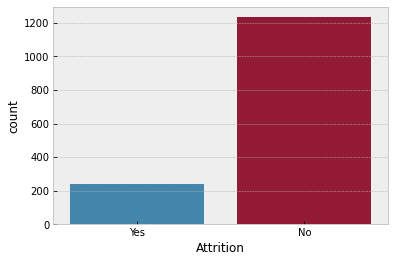

In [7]:
sns.countplot(df['Attrition'])

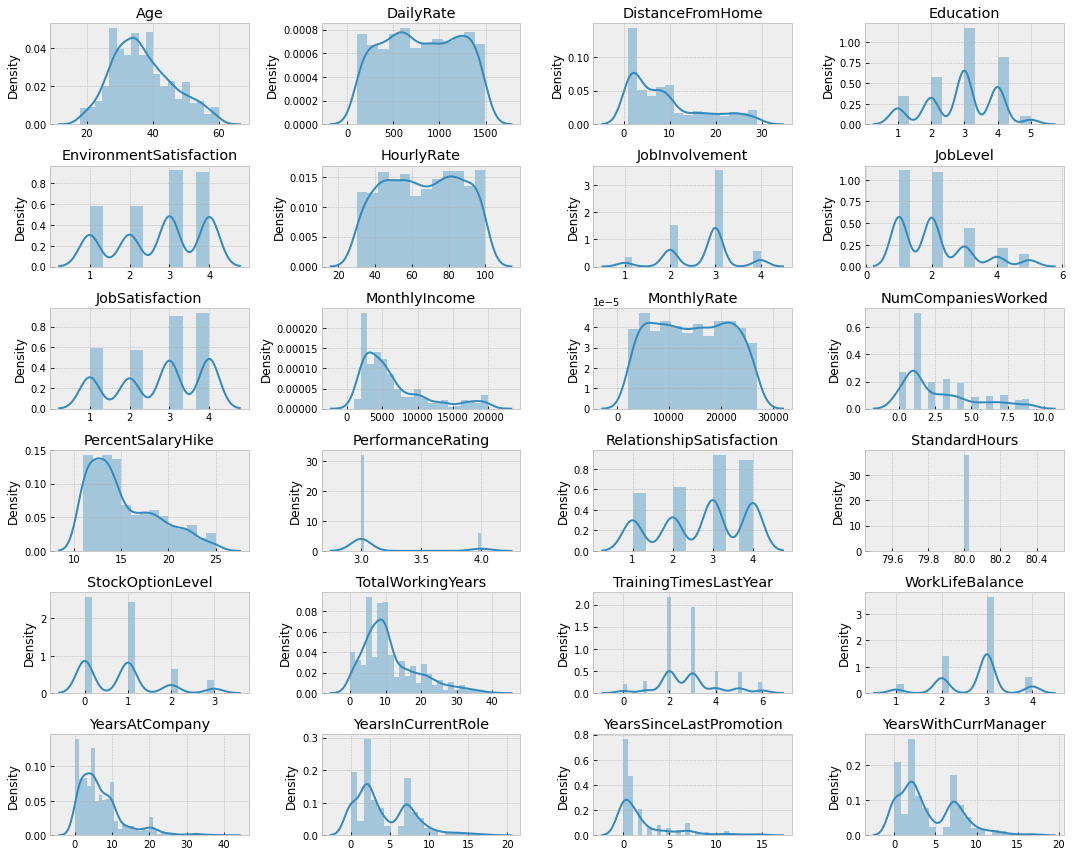

In [44]:
#Podemos usar un poco de código para visualizar más de una variable a la vez

variables = ['Age', 'DailyRate','DistanceFromHome', 'Education',
'EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel',
'JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked',
'PercentSalaryHike','PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',    
'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',
'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager' ]  


columns = 4

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(15,12))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.distplot(df[variable], ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()

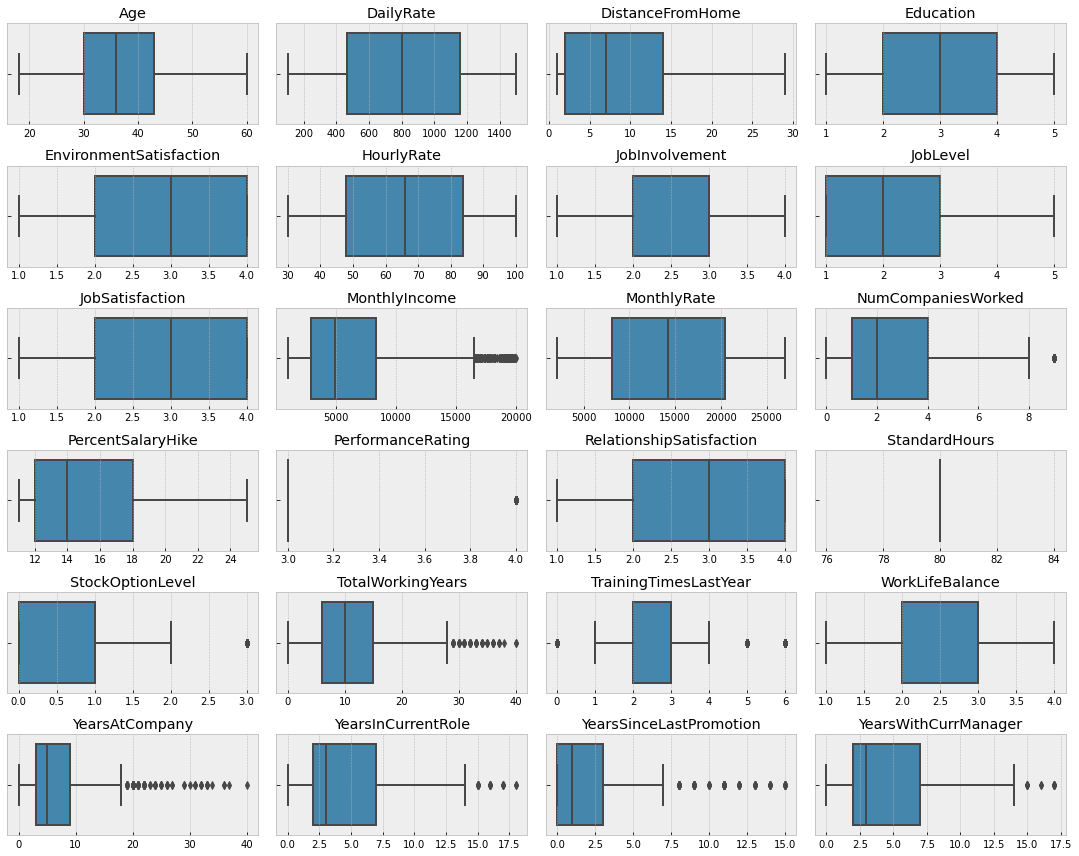

In [45]:
#Podemos usar un poco de código para visualizar más de una variable a la vez

variables = ['Age', 'DailyRate','DistanceFromHome', 'Education',
'EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel',
'JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked',
'PercentSalaryHike','PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',    
'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',
'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager' ]  


columns = 4

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(15,12))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.boxplot(df[variable], ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()

monthly income vs job involvemetn
attrition vs montly income
work life balance vs satisfaction


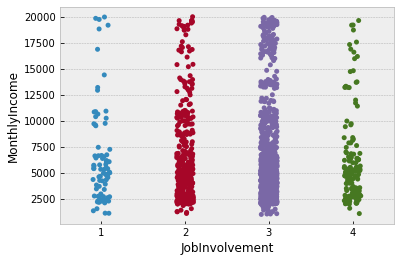

In [9]:
ax = sns.stripplot(x="JobInvolvement", y="MonthlyIncome", data=df)
plt.ylabel('MonthlyIncome')
plt.show()

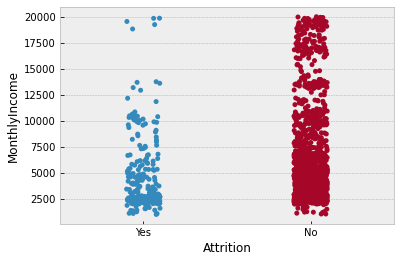

In [10]:
#pokemon.plot.hexbin(x='Attack', y='Defense', gridsize=15)

ax = sns.stripplot(x="Attrition", y="MonthlyIncome", data=df)
plt.ylabel('MonthlyIncome')
plt.show()

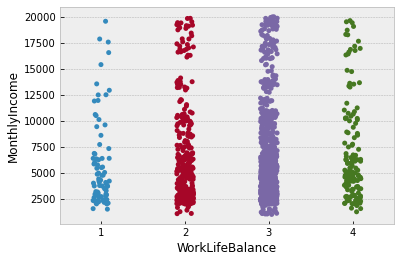

In [11]:
ax = sns.stripplot(x="WorkLifeBalance", y="MonthlyIncome", data=df)
plt.ylabel('MonthlyIncome')
plt.show()

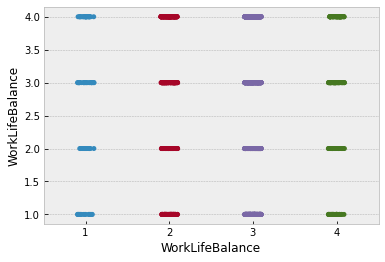

In [12]:
# Elegimos: "WorkLifeBalance", "JobSatisfaction"

ax = sns.stripplot(x="WorkLifeBalance", y="JobSatisfaction", data=df)
plt.ylabel('WorkLifeBalance')
plt.show()


In [19]:
table = pd.pivot_table(df[['WorkLifeBalance','JobSatisfaction']], 
                       columns='JobSatisfaction', index='WorkLifeBalance',
                       aggfunc=len)
table

JobSatisfaction,1,2,3,4
WorkLifeBalance,,,,
1,17,18,21,24
2,61,58,101,124
3,182,175,273,263
4,29,29,47,48


In [21]:
table.sum()

JobSatisfaction
1    289
2    280
3    442
4    459
dtype: int64

<AxesSubplot:xlabel='JobSatisfaction', ylabel='WorkLifeBalance'>

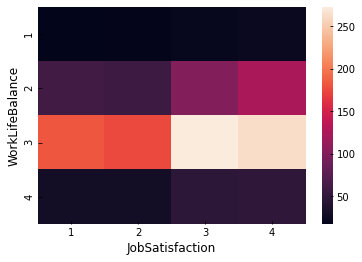

In [24]:
ax = plt.axes()
sns.heatmap(table, ax = ax)

In [40]:
# ! pip install plotly
import plotly.express as px

fig = px.imshow(table)

fig = px.imshow(table/table.sum(),color_continuous_scale='Inferno', 
                labels=dict(x="Level of JobSatisfaction", y="WorkLifeBalance", color="Level of satisfaction"),
                x=['1', '2', '3', '4'],
                y=['Bad','Good','Better','Best']
               )
fig.update_xaxes(side="top")

fig.show()